# Project Name : Credit Card Fraud Detection using Auto-ML (PyCaret)
___

In this project, we will first make our predictions using Machine Learning Techniques and then we will use Auto ML Technique to do the same. We will be using `PyCaret` for the Auto-ML part.

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In this project, we will be implementing Anamoly detection to detect wheteher there is any fraudulent transaction.

Anomaly detection (aka outlier analysis) is a step in data mining that identifies data points that deviates from the mornal behaviour of the dateset.

### The Data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It <b>contains only numerical input variables</b> which are the result of a <b>PCA transformation</b>.<br>
(Due to confidentiality issues, the original features and more background information about the data cannot be provided)

Features V1, V2, … V28 are the principal components obtained with PCA. The only features which have not been transformed with PCA are <b>'Time' and 'Amount'</b>. 

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the <b>response variable</b> and it takes <b>value 1 in case of fraud</b> and 0 otherwise.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

### Loading the Data

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## DATA ANALYSIS
___

In [4]:
df.shape

(284807, 31)

### Distribution of Normal and Fraud Transactions in the dataset

(0.0, 325000.0)

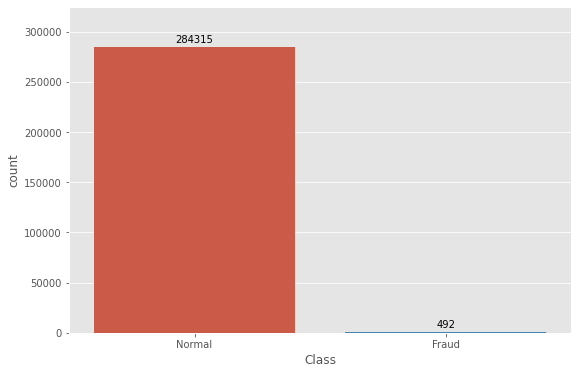

In [5]:
plt.figure(figsize=(9, 6))

fg = sns.countplot(data=df, x='Class')

for p in fg.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 5000
    fg.text(_x, _y, f"{p.get_height()}",
            color='black', ha='center')
    
plt.xticks(range(2), ('Normal', 'Fraud'))
plt.ylim(0, 3.25e5)

In [6]:
# FRAUD Transactions

df[df['Class']==1].shape

(492, 31)

In [7]:
# NORMAL Transactions

df[df['Class']==0].shape

(284315, 31)

### Let's check the `Amount` distribution for  Normal and Fraud Transactions in the dataset

In [8]:
# FRAUD Transactions

df[df['Class']==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

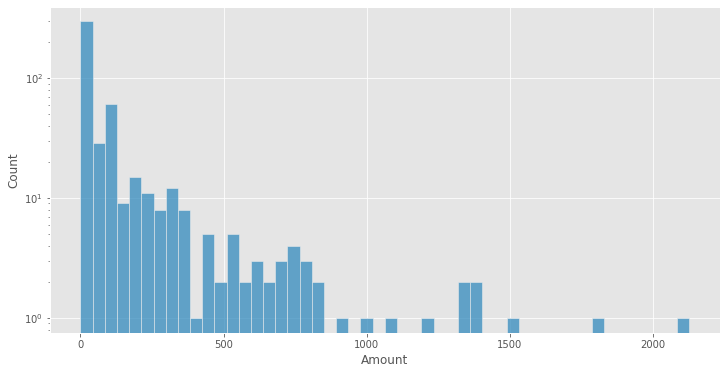

In [9]:
# FRAUD Transactions

plt.figure(figsize=(12,6))

sns.histplot(df[df['Class']==1]['Amount'], bins=50)

plt.yscale('log')

In [10]:
# NORMAL Transactions

df[df['Class']==0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

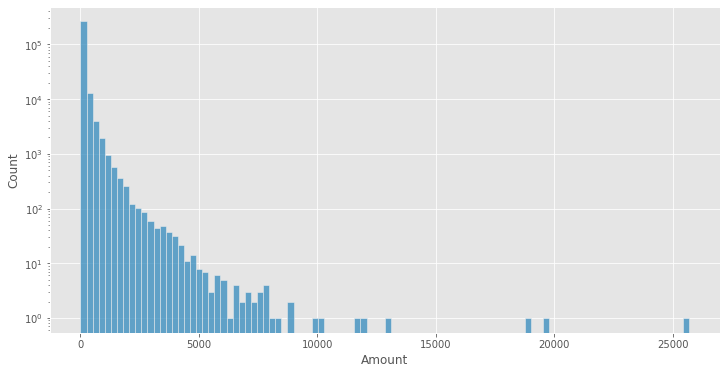

In [11]:
# NORMAL Transactions

plt.figure(figsize=(12,6))

sns.histplot(df[df['Class']==0]['Amount'], bins=100)

plt.yscale('log')

### `Time` distribution for  Normal and Fraud Transactions in the dataset

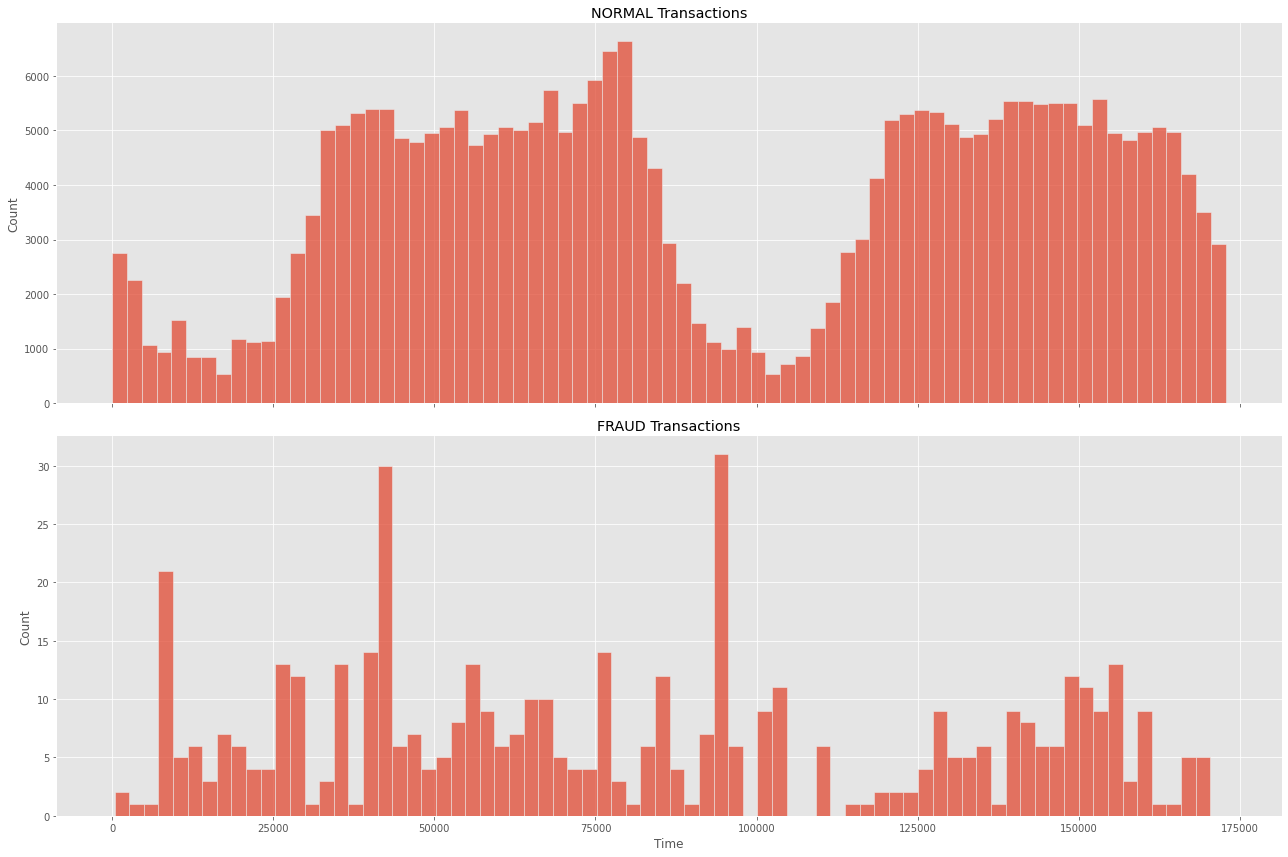

In [12]:
fg = sns.FacetGrid(data=df[['Time', 'Class']], row='Class', 
                   aspect=3, height=6, sharey=False)

fg.map(sns.histplot, 'Time', bins=75)

for ax,title in zip(fg.axes.flatten(),("NORMAL Transactions", "FRAUD Transactions")):
    ax.set_title(title)

### Correlation between `Class` and other features

<AxesSubplot:>

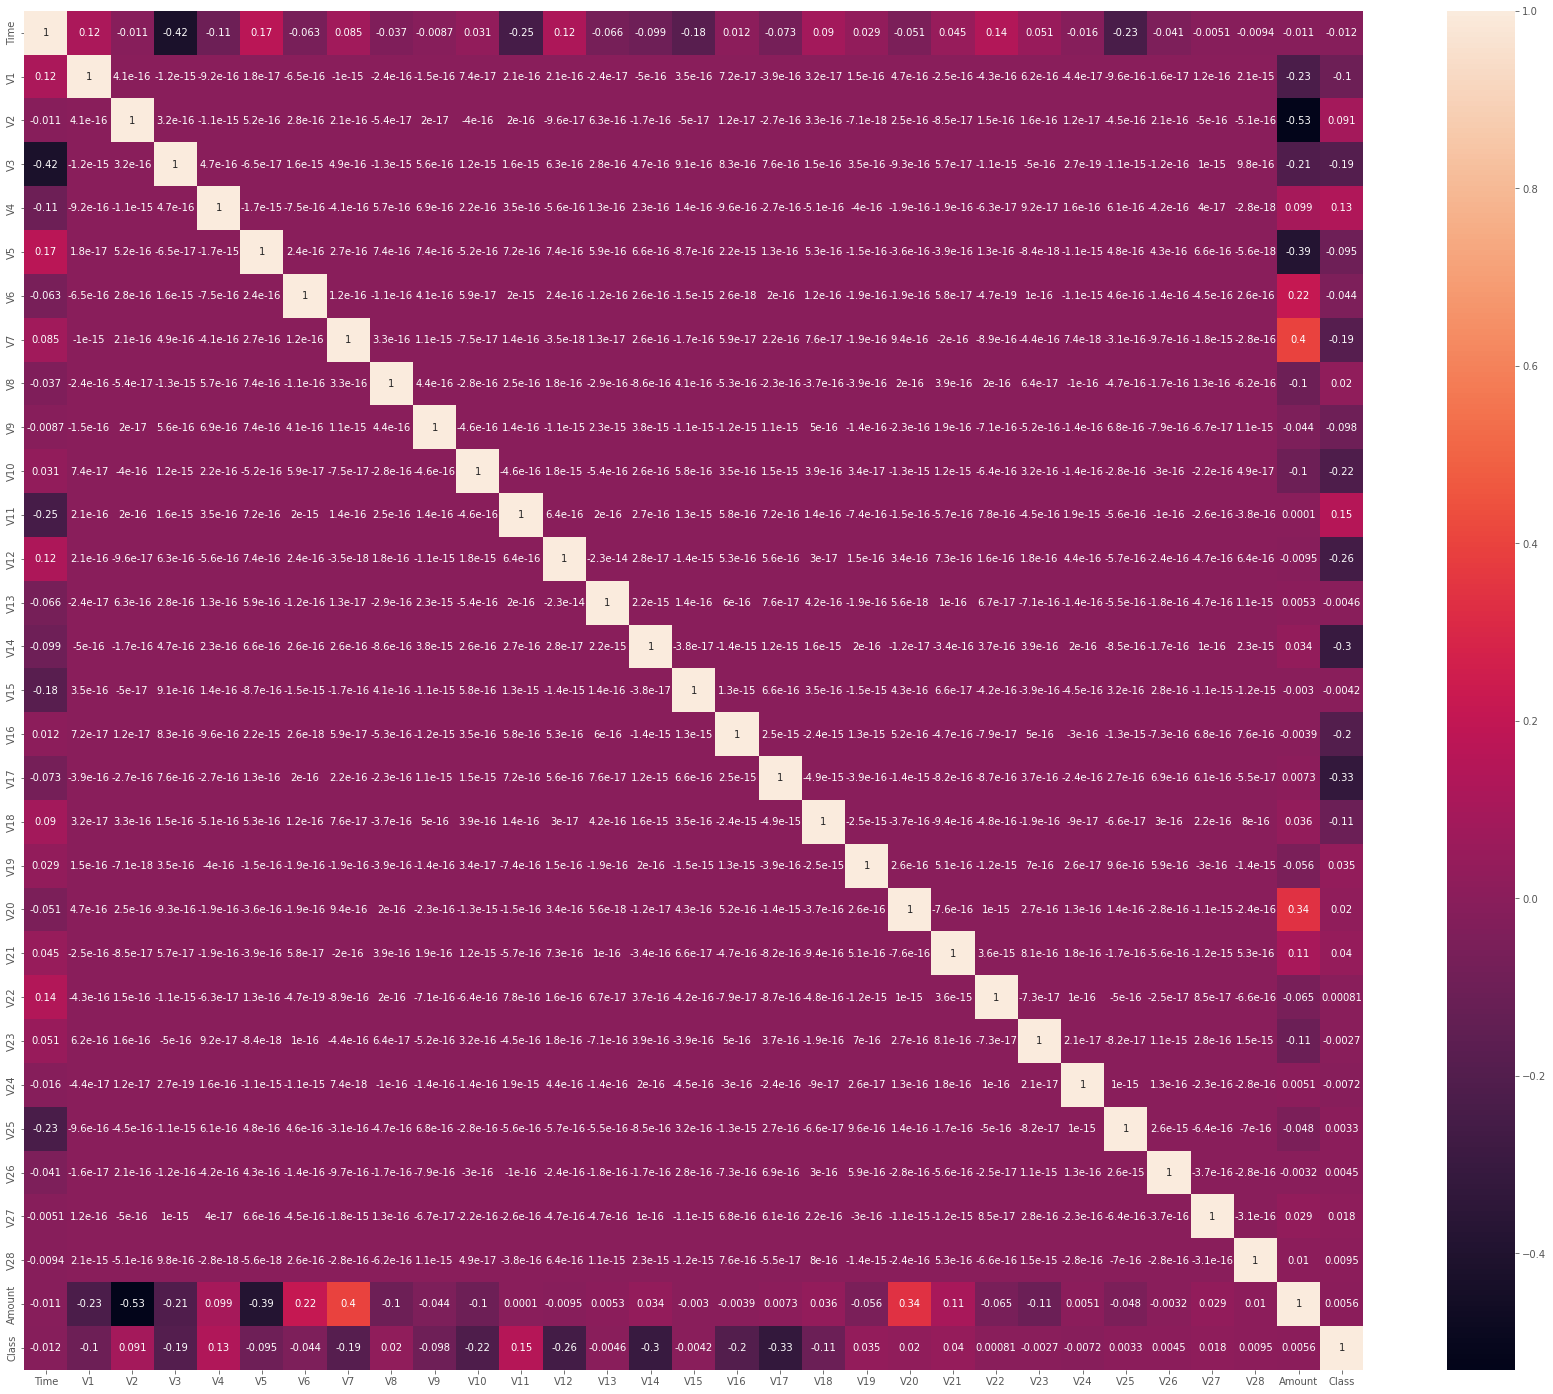

In [13]:
plt.figure(figsize=(30, 25))

sns.heatmap(data=df.corr(), annot=True)

In [14]:
df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

#### Strong negative correlation with V17, V14 and V12

### Analysis of `V17` for Normal & Fraud Transactions

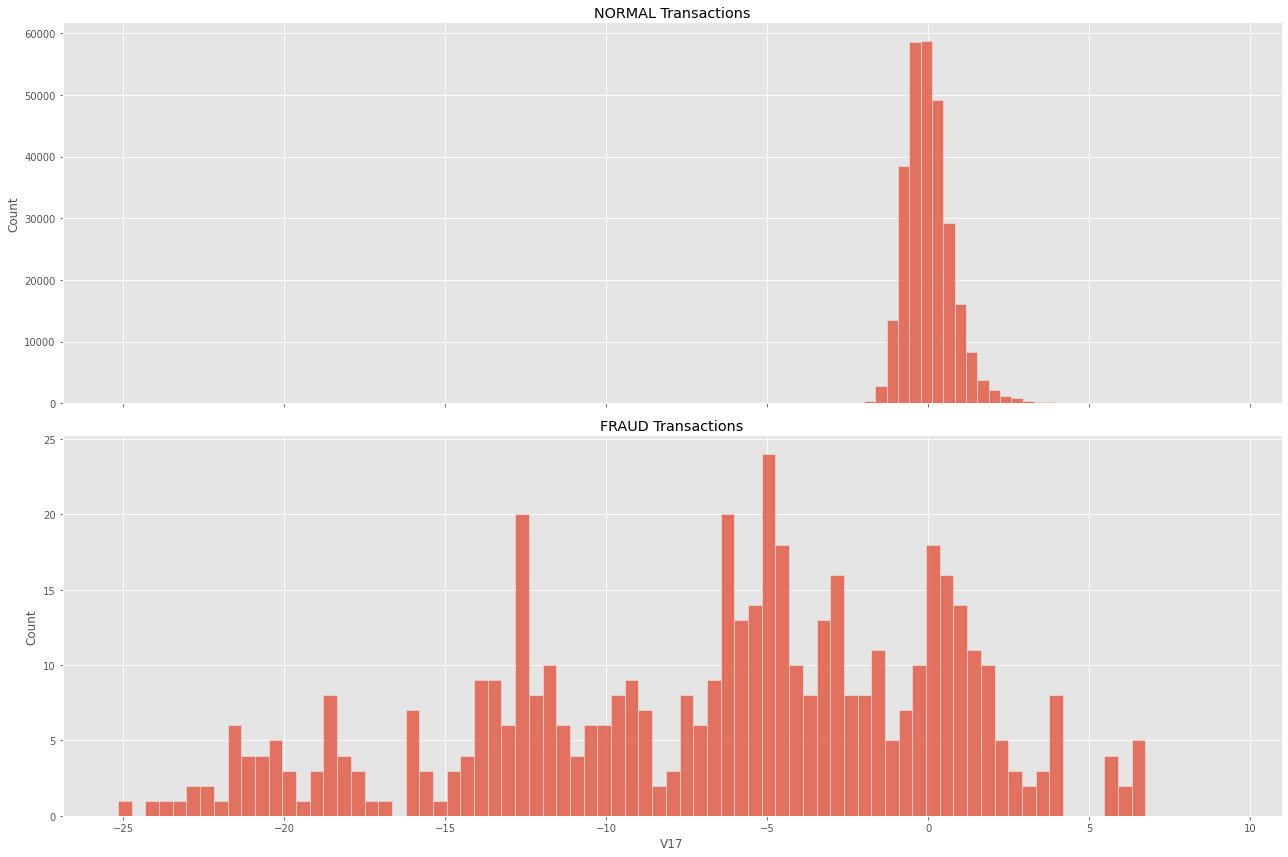

In [15]:
fg = sns.FacetGrid(data=df[['V17', 'Class']], row='Class', 
                   aspect=3, height=6, sharey=False)

fg.map(sns.histplot, 'V17', bins=75)

for ax,title in zip(fg.axes.flatten(),("NORMAL Transactions", "FRAUD Transactions")):
    ax.set_title(title)

### Analysis of `V14` for Normal & Fraud Transactions

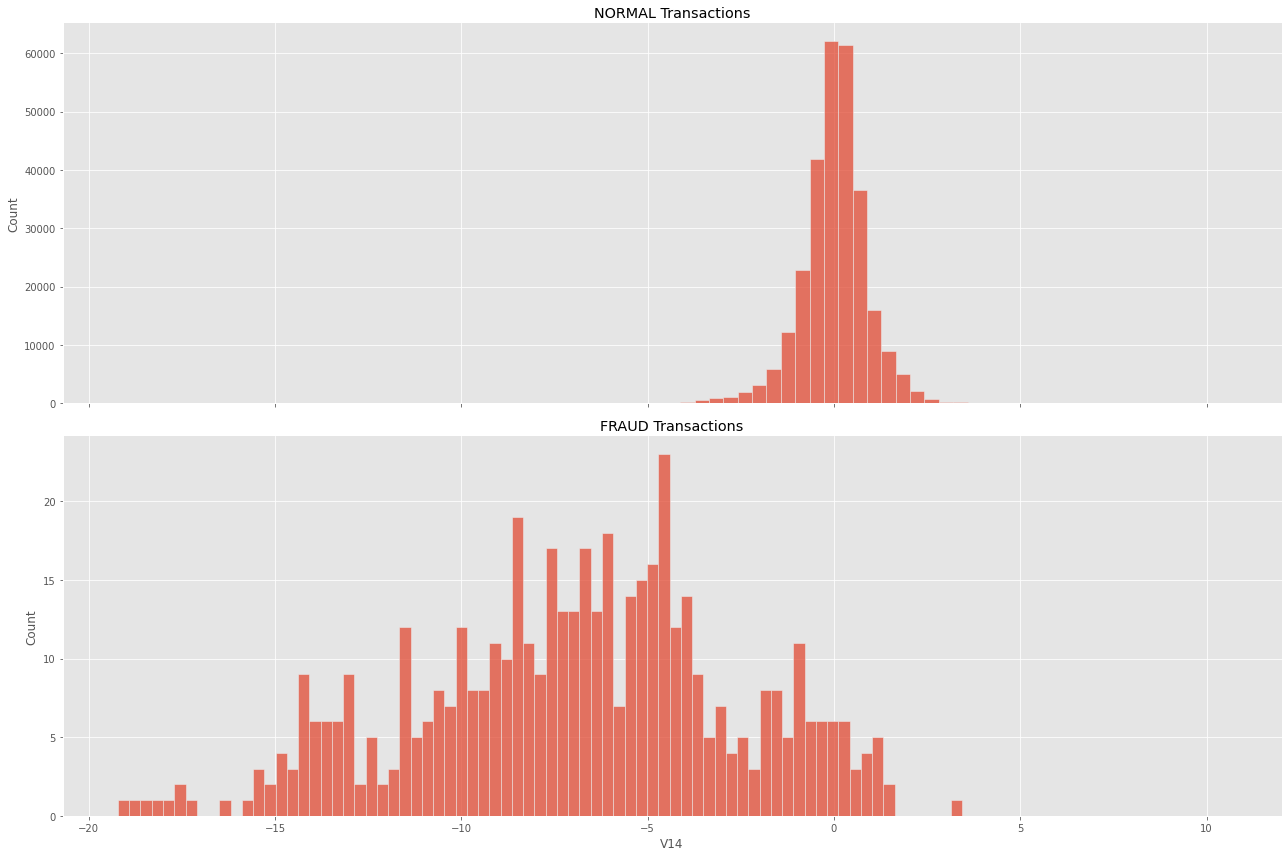

In [16]:
fg = sns.FacetGrid(data=df[['V14', 'Class']], row='Class', 
                   aspect=3, height=6, sharey=False)

fg.map(sns.histplot, 'V14', bins=75)

for ax,title in zip(fg.axes.flatten(),("NORMAL Transactions", "FRAUD Transactions")):
    ax.set_title(title)

### Analysis of `V12` for Normal & Fraud Transactions

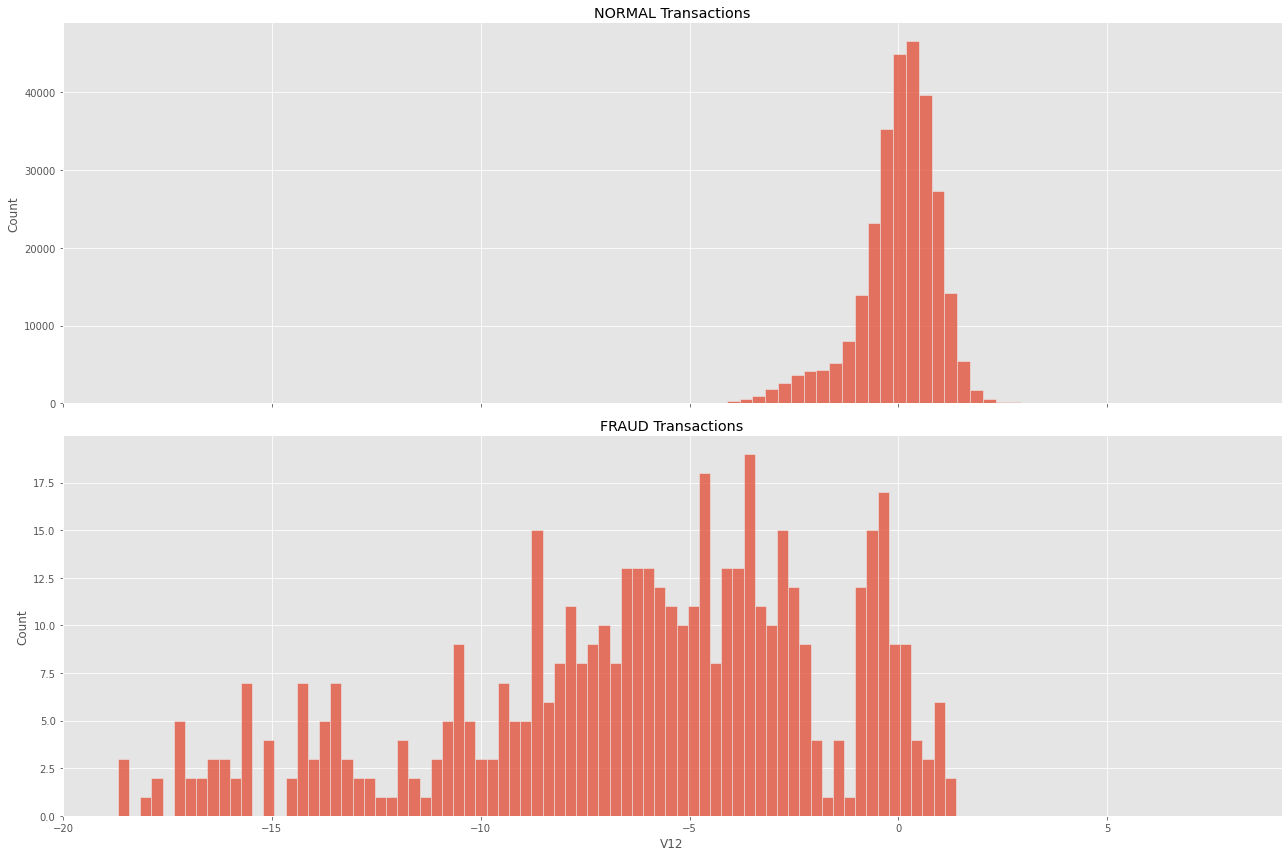

In [17]:
fg = sns.FacetGrid(data=df[['V12', 'Class']], row='Class', 
                   aspect=3, height=6, sharey=False)

fg.map(sns.histplot, 'V12', bins=75)

for ax,title in zip(fg.axes.flatten(),("NORMAL Transactions", "FRAUD Transactions")):
    ax.set_title(title)

### Splitting the Data

In [18]:
X = df.drop(columns=['Class'])
y = df['Class']

In [19]:
X.shape

(284807, 30)

In [20]:
y.shape

(284807,)

In [21]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [22]:
# Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, IsolationForest

# Metrics
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score,\
                            classification_report, confusion_matrix

# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### `RandomForestClassifier`

In [23]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1)

rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

print("Balanced Accuracy :", balanced_accuracy_score(y_test, pred_rfc))
print()
print("Number of Errors :", (pred_rfc != y_test).sum())
print()
print(confusion_matrix(y_test, pred_rfc))
print()
print(classification_report(y_test, pred_rfc))

Balanced Accuracy : 0.9153884258170663

Number of Errors : 32

[[85298     9]
 [   23   113]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### `ExtraTreesClassifier`

In [24]:
etc = ExtraTreesClassifier(n_estimators=200, n_jobs=-1)

etc.fit(X_train, y_train)

pred_etc = etc.predict(X_test)

print("Balanced Accuracy :", balanced_accuracy_score(y_test, pred_etc))
print()
print("Number of Errors :", (pred_etc != y_test).sum())
print()
print(confusion_matrix(y_test, pred_etc))
print()
print(classification_report(y_test, pred_etc))

Balanced Accuracy : 0.8970119340596144

Number of Errors : 36

[[85299     8]
 [   28   108]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.79      0.86       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### `IsolationForest`

In [25]:
iso_forest = IsolationForest(n_estimators=200, n_jobs=-1, max_samples=len(X_train))

iso_forest.fit(X_train, y_train)

pred_iso_forest = iso_forest.predict(X_test)

pred_iso_forest

array([-1,  1,  1, ...,  1,  1,  1])

In [26]:
pred_iso_forest[pred_iso_forest == 1] = 0
pred_iso_forest[pred_iso_forest == -1] = 1

pred_iso_forest

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
print("Balanced Accuracy :", balanced_accuracy_score(y_test, pred_iso_forest))
print()
print("Number of Errors :", (pred_iso_forest != y_test).sum())
print()
print(confusion_matrix(y_test, pred_iso_forest))
print()
print(classification_report(y_test, pred_iso_forest))

Balanced Accuracy : 0.705173149710492

Number of Errors : 201

[[85186   121]
 [   80    56]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.32      0.41      0.36       136

    accuracy                           1.00     85443
   macro avg       0.66      0.71      0.68     85443
weighted avg       1.00      1.00      1.00     85443



## Solving the problem using Auto ML (`pycaret` library)
___

In [28]:
from pycaret import classification as pyclass

model = pyclass.setup(data=df, target="Class")

,Description,Value
0,session_id,5172
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
from sklearn.model_selection import StratifiedKFold

sk_fold = StratifiedKFold(n_splits=5)

pyclass.compare_models(sort="F1", fold=sk_fold)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,0.9453,0.7920,0.9455,0.8619,0.8617,0.8651,11.1380
xgboost,Extreme Gradient Boosting,0.9995,0.9796,0.7834,0.9450,0.8560,0.8558,0.8598,60.1960
rf,Random Forest Classifier,0.9995,0.9427,0.7749,0.9411,0.8498,0.8496,0.8537,58.0140
lda,Linear Discriminant Analysis,0.9994,0.8987,0.7579,0.8670,0.8085,0.8082,0.8102,1.0000
dt,Decision Tree Classifier,0.9991,0.8716,0.7436,0.7555,0.7493,0.7488,0.7490,6.4660
ada,Ada Boost Classifier,0.9992,0.9637,0.6809,0.8080,0.7388,0.7384,0.7412,23.5100
lr,Logistic Regression,0.9991,0.9413,0.5928,0.8208,0.6861,0.6857,0.6959,8.2120
ridge,Ridge Classifier,0.9989,0.0000,0.4302,0.8414,0.5674,0.5669,0.6001,0.1740
gbc,Gradient Boosting Classifier,0.9988,0.6213,0.4538,0.8050,0.5357,0.5353,0.5746,124.4900
lightgbm,Light Gradient Boosting Machine,0.9963,0.6874,0.4911,0.2979,0.3500,0.3485,0.3694,2.5100


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5172, verbose=0,
                     warm_start=False)

### Best Model by `pycaret` Analysis : `ExtraTreesClassifier`

In [30]:
extra_trees = pyclass.create_model('et', fold=sk_fold)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9409,0.7714,0.9310,0.8438,0.8435,0.8472
1,0.9996,0.9264,0.8000,0.9492,0.8682,0.8680,0.8712
2,0.9995,0.9554,0.7714,0.9310,0.8438,0.8435,0.8472
3,0.9996,0.9629,0.8169,0.9831,0.8923,0.8921,0.8960
4,0.9995,0.9409,0.8000,0.9333,0.8615,0.8613,0.8639
Mean,0.9996,0.9453,0.7920,0.9455,0.8619,0.8617,0.8651
SD,0.0001,0.0127,0.0179,0.0199,0.0180,0.0180,0.0181


In [31]:
extra_trees

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5172, verbose=0,
                     warm_start=False)

### Tuning the Model

In [32]:
tuned_model = pyclass.tune_model(extra_trees, fold=sk_fold, tuner_verbose=2,
                                 n_iter=20, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9704,0.7857,0.7333,0.7586,0.7582,0.7586
1,0.9992,0.9647,0.8286,0.7436,0.7838,0.7834,0.7845
2,0.9992,0.9875,0.8143,0.7703,0.7917,0.7913,0.7916
3,0.9993,0.9752,0.8169,0.8169,0.8169,0.8166,0.8166
4,0.9992,0.9768,0.8286,0.7532,0.7891,0.7887,0.7896
Mean,0.9992,0.9749,0.8148,0.7635,0.7880,0.7876,0.7882
SD,0.0001,0.0076,0.0157,0.0294,0.0186,0.0186,0.0185


### Model Evaluation

In [33]:
pred_automl = pyclass.predict_model(extra_trees, data=X_test)

pred_automl

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Label,Score
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,0.95
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,1.00
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,1.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,1.00
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180795,124702.0,-0.673320,1.823100,-2.152665,-1.051308,1.822568,1.319646,-0.228012,-1.743339,-0.665095,...,-0.929823,0.561185,2.970343,-0.632171,0.095316,0.031770,0.093565,3.99,0,1.00
259979,159354.0,2.125553,-0.065046,-1.537467,0.125578,0.500319,-0.359530,0.124248,-0.201678,0.551045,...,-0.878330,0.281129,0.035931,-0.173013,0.207555,-0.075438,-0.060078,1.79,0,1.00
21885,31911.0,0.746800,-1.028053,1.127833,1.631418,-1.193487,0.946088,-0.857322,0.480905,1.662617,...,0.058198,-0.235697,-0.457910,0.328226,-0.219767,0.058352,0.058441,195.60,0,1.00
217812,141043.0,2.080547,0.167780,-1.722107,0.403323,0.451991,-0.848388,0.190703,-0.239152,0.481197,...,-0.945073,0.332659,0.484916,-0.246959,0.174693,-0.061887,-0.030910,0.89,0,1.00


In [34]:
pred_automl = pred_automl['Label'].values

pred_automl

array([1, 0, 0, ..., 0, 0, 0])

In [35]:
print("Balanced Accuracy :", balanced_accuracy_score(y_test, pred_automl))
print()
print("Number of Errors :", (pred_automl != y_test).sum())
print()
print(confusion_matrix(y_test, pred_automl))
print()
print(classification_report(y_test, pred_automl))

Balanced Accuracy : 0.9668941811547084

Number of Errors : 12

[[85304     3]
 [    9   127]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.98      0.93      0.95       136

    accuracy                           1.00     85443
   macro avg       0.99      0.97      0.98     85443
weighted avg       1.00      1.00      1.00     85443



## Result
___

We were able to utilize Auto ML by using the **`pycaret`** library to successfully train and tune a model for our problem, which was more efficient than the other models designed using traditional ML methods.